In [119]:
import pandas as pd

In [165]:
df = pd.read_csv('Pokemon.csv')

In [208]:
pip install matplotlib

In [209]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------ -------------------------------- 51.2/294.9 kB 650.2 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00


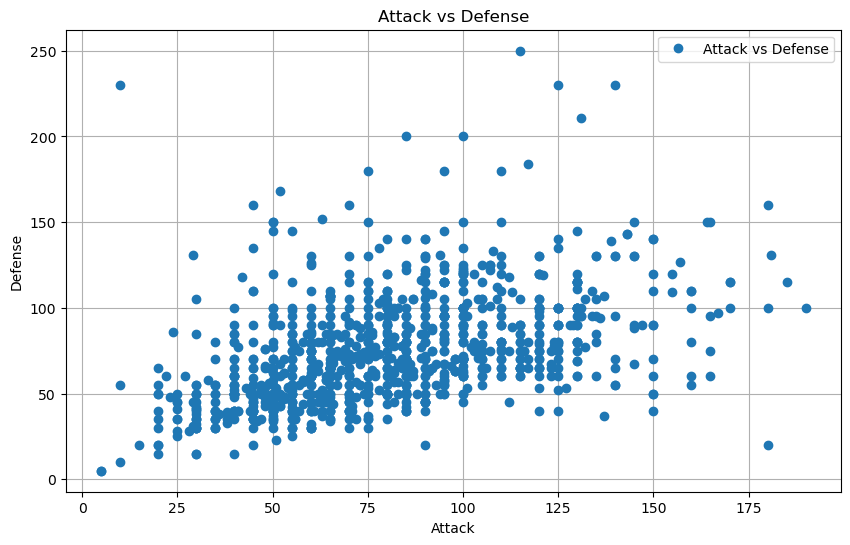

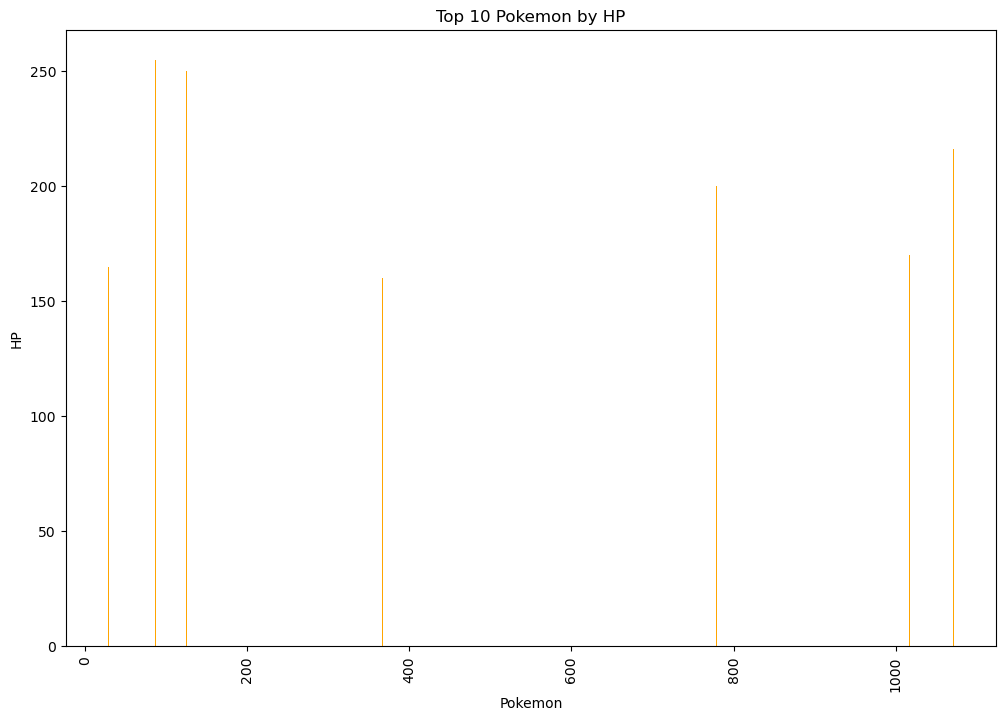

In [206]:
import matplotlib.pyplot as plt
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['attack'], df['defense'], 'o', label='Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot (misalnya, total HP of top 10 Pokemon)
top_10_pokemon = df.nlargest(10, 'hp')
plt.figure(figsize=(12, 8))
plt.bar(top_10_pokemon['name'], top_10_pokemon['hp'], color='orange')
plt.xlabel('Pokemon')
plt.ylabel('HP')
plt.title('Top 10 Pokemon by HP')
plt.xticks(rotation=90)
plt.show()

C:\Users\farhan\AppData\Local\Temp\ipykernel_2408\359087097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')


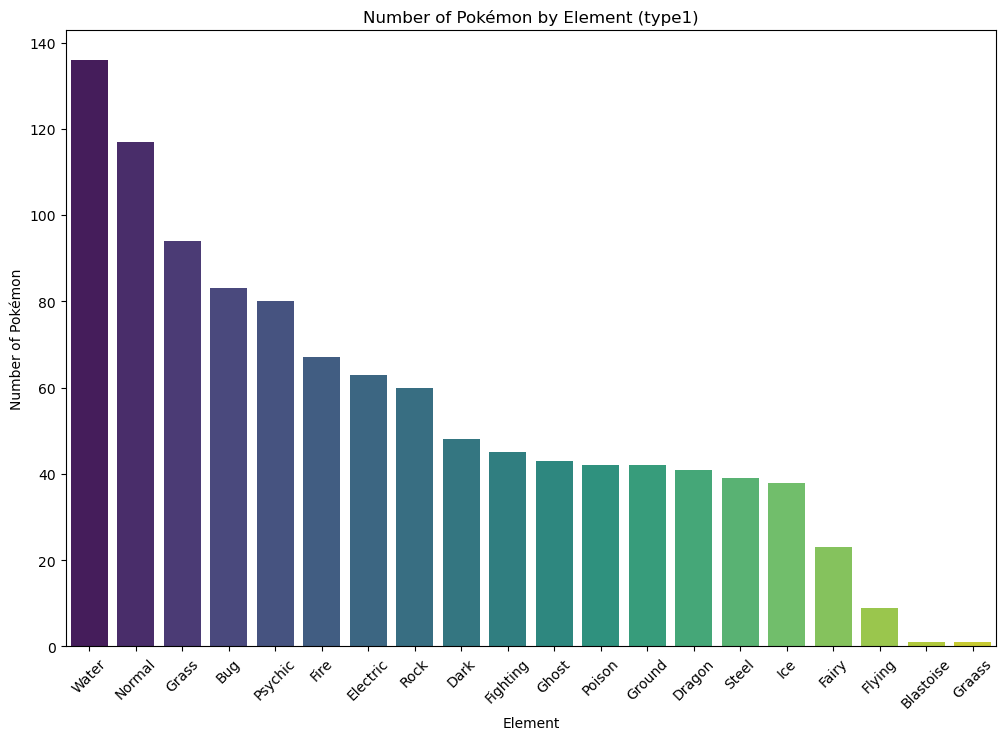

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('Pokemon.csv')

# Hitung jumlah Pokémon per elemen
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['Element', 'Number of Pokémon']

# Plot Bar dengan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')
plt.xlabel('Element')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon by Element (type1)')
plt.xticks(rotation=45)
plt.show()

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1072 non-null   int64  
 1   Unnamed: 0    1072 non-null   int64  
 2   number        1072 non-null   int64  
 3   name          1072 non-null   object 
 4   type1         1072 non-null   object 
 5   type2         574 non-null    object 
 6   total         1072 non-null   int64  
 7   hp            1037 non-null   float64
 8   attack        1070 non-null   float64
 9   defense       1072 non-null   int64  
 10  sp_attack     1043 non-null   float64
 11  sp_defense    1072 non-null   int64  
 12  speed         1072 non-null   int64  
 13  generation    1072 non-null   int64  
 14  legendary     964 non-null    object 
dtypes: float64(3), int64(8), object(4)
memory usage: 125.8+ KB


In [167]:
df.head()

,Unnamed: 0.1,Unnamed: 0,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,0,415,337,Lunatone,Rock,Psychic,440,70.0,55.0,65,95.0,85,70,3,False
1,1,463,380,Latias,Dragon,Psychic,600,80.0,80.0,90,110.0,130,110,3,True
2,2,179,131,Gigantamax Lapras,Water,Ice,535,130.0,85.0,80,85.0,95,60,1,False
3,3,526,432,Purugly,Normal,NaN,452,71.0,82.0,64,64.0,59,112,4,False
4,4,195,144,Articuno,Ice,Flying,580,90.0,85.0,100,95.0,125,85,1,True


In [168]:
df.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
number            0
name              0
type1             0
type2           498
total             0
hp               35
attack            2
defense           0
sp_attack        29
sp_defense        0
speed             0
generation        0
legendary       108
dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [170]:
# Drop the 'Transaction ID' column if it is not useful
df = df.drop(columns=['Unnamed: 0.1'])
df = df.drop(columns=['Unnamed: 0'])

In [174]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,337,Lunatone,Rock,Psychic,440,70.0,55.0,65,95.0,85,70,3,False
1,380,Latias,Dragon,Psychic,600,80.0,80.0,90,110.0,130,110,3,True
2,131,Gigantamax Lapras,Water,Ice,535,130.0,85.0,80,85.0,95,60,1,False
3,432,Purugly,Normal,NaN,452,71.0,82.0,64,64.0,59,112,4,False
4,144,Articuno,Ice,Flying,580,90.0,85.0,100,95.0,125,85,1,True


In [171]:
print(df.shape)

(1072, 13)


In [172]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [173]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#Fit the imputer on the dataset and transform it to fill missing values
imp_data = imputer.fit_transform(numerical_cols)

# Convert the result back to a DataFrame
df_imp = pd.DataFrame(imp_data, columns=numerical_cols.columns)

In [175]:
df_final = pd.concat([df_imp, categorical_cols], axis=1)

In [178]:
df_final.head()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,name,type1,type2,legendary
0,337.0,440.0,70.0,55.0,65.0,95.0,85.0,70.0,3.0,Lunatone,Rock,Psychic,False
1,380.0,600.0,80.0,80.0,90.0,110.0,130.0,110.0,3.0,Latias,Dragon,Psychic,True
2,131.0,535.0,130.0,85.0,80.0,85.0,95.0,60.0,1.0,Gigantamax Lapras,Water,Ice,False
3,432.0,452.0,71.0,82.0,64.0,64.0,59.0,112.0,4.0,Purugly,Normal,NaN,False
4,144.0,580.0,90.0,85.0,100.0,95.0,125.0,85.0,1.0,Articuno,Ice,Flying,True


In [183]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   object 
 10  type1       1072 non-null   object 
 11  type2       574 non-null    object 
 12  legendary   964 non-null    object 
dtypes: float64(9), object(4)
memory usage: 109.0+ KB


In [189]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['name'] = label_encoder.fit_transform(df['name'])
df_final['type1'] = label_encoder.fit_transform(df['type1'])
df_final['type2'] = label_encoder.fit_transform(df['type2'])
df_final['legendary'] = label_encoder.fit_transform(df['legendary'])

In [190]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   int64  
 10  type1       1072 non-null   int64  
 11  type2       1072 non-null   int64  
 12  legendary   1072 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 109.0 KB


In [191]:
# Separate
train_df = df_final.iloc[:964,:]
test_df = df_final.iloc[964:,:5]

In [192]:
x = train_df.drop('legendary', axis=1)
y = train_df['legendary'].astype('category').cat.codes

In [193]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

MODEL 1

In [194]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [195]:
# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

In [196]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.98

Confusion Matrix:
[[172   1]
 [  2  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       173
           1       0.95      0.90      0.92        20

    accuracy                           0.98       193
   macro avg       0.97      0.95      0.96       193
weighted avg       0.98      0.98      0.98       193



MODEL 2

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [203]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [204]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       173
           1       0.74      0.85      0.79        20

    accuracy                           0.95       193
   macro avg       0.86      0.91      0.88       193
weighted avg       0.96      0.95      0.95       193

